In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
data = pd.read_csv('../data/clean_data/data_v1.csv', index_col=0)
data.head()

,age,job_industry_recode,school_enroll_lastweek,employment,fam_size,full_time_work,full_part_school,highest_education,hs_col_unenrolled,weekly_earnings,...,poverty_ratio,family_earn_ly,fam_id,fam_med_costs,fam_outofpocket_med_costs,fam_otc_med_costs,fam_rent_val,fips,state,state.1
1,67,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,0,0,Some College But No Degree,0,0,...,BELOW POVERTY LEVEL,0,1,0,0,0,0,ME,4,23
2,74,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,0,0,High school graduate-high school diploma,0,0,...,BELOW POVERTY LEVEL,0,1,0,60,60,0,ME,4,23
3,66,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,0,0,High school graduate-high school diploma,0,0,...,150 AND ABOVE THE POVERTY LEVEL,0,1,0,0,0,0,ME,3,23
4,68,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,0,0,High school graduate-high school diploma,0,0,...,150 AND ABOVE THE POVERTY LEVEL,0,1,0,0,0,0,ME,3,23
5,52,"Not in universe, or children",No,0,1,0,0,High school graduate-high school diploma,0,0,...,150 AND ABOVE THE POVERTY LEVEL,42000,1,50,1370,0,0,ME,3,23


In [3]:
pd.set_option("display.max_columns", None)

In [58]:
data = data[data['poverty_ratio'] != 'NOT IN POVERTY UNIVERSE']
data.head()

,age,job_industry_recode,school_enroll_lastweek,employment,fam_size,full_time_work,full_part_school,highest_education,hs_col_unenrolled,weekly_earnings,hourly_work_yn,hours_worked,labor_force_recode,marital_status,main_job_industry_recode,sex,union_contract_avail,union_member_yn,reason_unemployed,weeks_unemployed,ft_pt_unem,age_recode_gt15,federal_gross_income_adj,need_childcare,hh_childcare_val,hh_childcare,health_insurance_ly,company_offer_insurance,poverty_ratio,family_earn_ly,fam_id,fam_med_costs,fam_outofpocket_med_costs,fam_otc_med_costs,fam_rent_val,fips,state,state.1
1,67,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,0,0,Some College But No Degree,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Never married,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,65 to 69 years,0,Niu,-1,Niu,Coverage for all of year,NIU,BELOW POVERTY LEVEL,0,1,0,0,0,0,ME,4,23
2,74,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Divorced,"Not in universe, or children",Male,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,70 to 74 years,9,Niu,-1,Niu,Coverage for all of year,NIU,BELOW POVERTY LEVEL,0,1,0,60,60,0,ME,4,23
3,66,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Widowed,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,65 to 69 years,0,Niu,-1,Niu,Coverage for all of year,NIU,150 AND ABOVE THE POVERTY LEVEL,0,1,0,0,0,0,ME,3,23
4,68,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Widowed,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,65 to 69 years,2400,Niu,-1,Niu,Coverage for all of year,NIU,150 AND ABOVE THE POVERTY LEVEL,0,1,0,0,0,0,ME,3,23
5,52,"Not in universe, or children",No,0,1,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Marr-civ sp present,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,50 to 54 years,47828,Niu,-1,Niu,Coverage for all of year,NIU,150 AND ABOVE THE POVERTY LEVEL,42000,1,50,1370,0,0,ME,3,23


Columns that are 0/1:
sex
employment
full_time_work
full_part_school

columns that are categorical
job industry recode
age_recode_gt15
highest education
marital status
ft_pt_unem
fips
labor_force_recode
sex

multinomial columns:
federal_gross_income_adj
fam_size
age
fam_med_costs
weeks_unemployed
hours_worked

target column = poverty

### Multinomial NB Data Prep

In [59]:
data_multinomial_cols = ['federal_gross_income_adj', 'fam_size', 'age', 'fam_med_costs', 'weeks_unemployed', 'hours_worked', 'poverty_ratio']
data_multinomial = data.loc[:,data_multinomial_cols]
data_multinomial.head()

,federal_gross_income_adj,fam_size,age,fam_med_costs,weeks_unemployed,hours_worked,poverty_ratio
1,0,0,67,0,0,0,BELOW POVERTY LEVEL
2,9,0,74,0,0,0,BELOW POVERTY LEVEL
3,0,1,66,0,0,0,150 AND ABOVE THE POVERTY LEVEL
4,2400,1,68,0,0,0,150 AND ABOVE THE POVERTY LEVEL
5,47828,1,52,50,0,0,150 AND ABOVE THE POVERTY LEVEL


In [60]:
data_multinomial.isna().sum()

federal_gross_income_adj    0
fam_size                    0
age                         0
fam_med_costs               0
weeks_unemployed            0
hours_worked                0
poverty_ratio               0
dtype: int64

In [104]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x = data_multinomial.drop('poverty_ratio', axis = 1)
x = x.clip(lower = 0)
y = data_multinomial['poverty_ratio']
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state=1111,
    test_size = 0.2
)
X_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)

In [105]:
y_train_rus.value_counts()

poverty_ratio
100 - 124 PERCENT OF THE POVERTY LEVEL    4460
125 - 149 PERCENT OF THE POVERTY LEVEL    4460
150 AND ABOVE THE POVERTY LEVEL           4460
BELOW POVERTY LEVEL                       4460
Name: count, dtype: int64

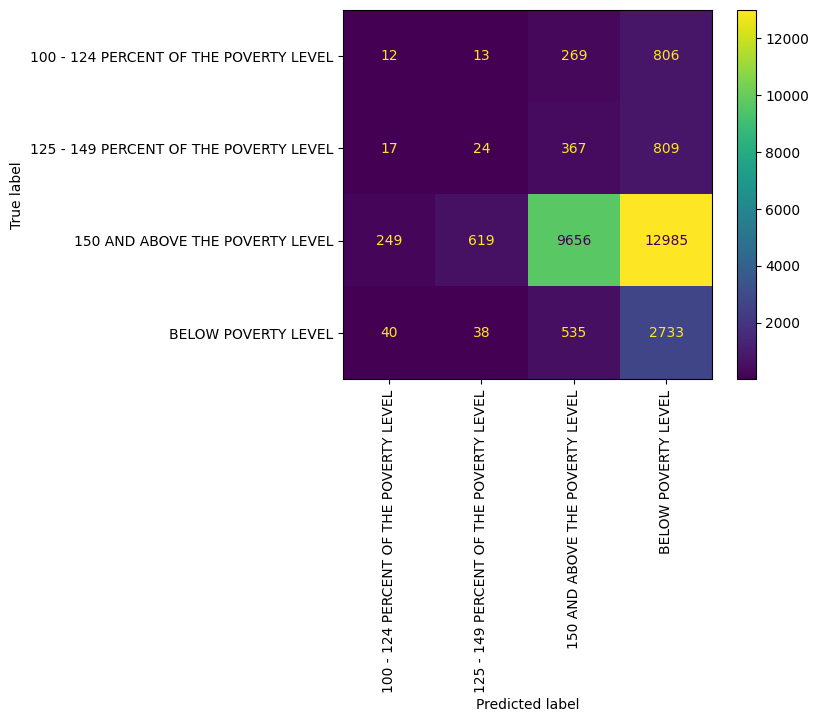

In [106]:
MNB = MultinomialNB()
MNB.fit(X_train_rus, y_train_rus)
Multinomial_Prediction = MNB.predict(x_test)
Multinomial_matrix = confusion_matrix(y_test, Multinomial_Prediction)
#matrix_MNB = ConfusionMatrixDisplay.from_estimator(confusion_matrix=Multinomial_matrix,
#                                     display_labels=MNB.classes_, xticks_rotation='vertical'
#)
ConfusionMatrixDisplay.from_estimator(MNB, x_test, y_test, xticks_rotation='vertical')
Multinomial_accuracy = MNB.score(x_test, y_test)

In [107]:
Multinomial_accuracy

0.4259221170985877

### Categorical NB Data Prep

In [20]:
from sklearn.preprocessing import LabelEncoder

In [91]:
data_categorical_cols = ['job_industry_recode', 'age_recode_gt15', 'highest_education', 'marital_status', 'ft_pt_unem', 'fips', 'labor_force_recode', 'sex']
data_categorical = data.loc[:,data_categorical_cols]
le = LabelEncoder()
for col in data_categorical_cols:
    data_categorical[col] = le.fit_transform(data_categorical[col])
data_categorical['poverty_ratio'] = data['poverty_ratio']
data_categorical.head()

,job_industry_recode,age_recode_gt15,highest_education,marital_status,ft_pt_unem,fips,labor_force_recode,sex,poverty_ratio
1,17,14,16,4,2,21,1,0,BELOW POVERTY LEVEL
2,17,15,12,0,2,21,1,1,BELOW POVERTY LEVEL
3,17,14,12,6,2,21,1,0,150 AND ABOVE THE POVERTY LEVEL
4,17,14,12,6,2,21,1,0,150 AND ABOVE THE POVERTY LEVEL
5,17,10,12,2,2,21,1,0,150 AND ABOVE THE POVERTY LEVEL


In [100]:
x = data_categorical.drop('poverty_ratio', axis = 1)
y = data_categorical['poverty_ratio']
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state=1111,
    test_size = 0.2
)
X_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)

In [101]:
y_train_rus.value_counts()

poverty_ratio
100 - 124 PERCENT OF THE POVERTY LEVEL    4460
125 - 149 PERCENT OF THE POVERTY LEVEL    4460
150 AND ABOVE THE POVERTY LEVEL           4460
BELOW POVERTY LEVEL                       4460
Name: count, dtype: int64

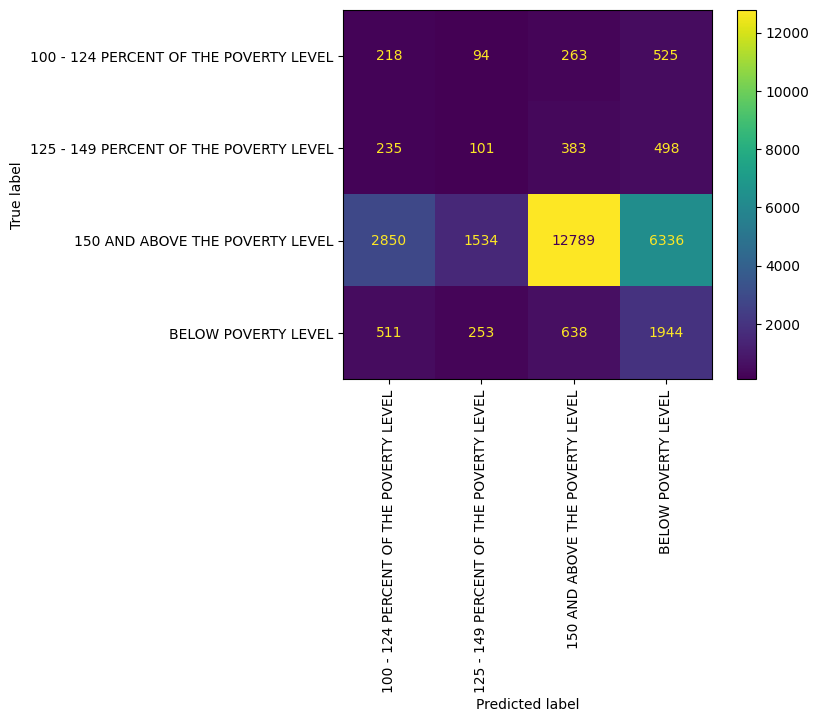

In [102]:
CNB = CategoricalNB()
CNB.fit(X_train_rus, y_train_rus)
Categorical_Prediction = CNB.predict(x_test)
Categorical_accuracy = CNB.score(x_test, y_test)
ConfusionMatrixDisplay.from_estimator(CNB, x_test, y_test, xticks_rotation='vertical')


In [103]:
print(Categorical_accuracy)

0.5159742218565748


### Bernoulli NB Data Prep

In [95]:
data_bernoulli_cols = ['sex', 'employment', 'full_time_work', 'full_part_school', 'poverty_ratio']
data_bernoulli = data.loc[:, data_bernoulli_cols]
data_bernoulli = data_bernoulli.query('employment < 2')
data_bernoulli = data_bernoulli.query('full_time_work < 2')
data_bernoulli = data_bernoulli.query('full_part_school < 2')
data_bernoulli['sex'] = le.fit_transform(data_bernoulli['sex'])


In [96]:
x = data_bernoulli.drop('poverty_ratio', axis = 1)
y = data_bernoulli['poverty_ratio']
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state=1111,
    test_size = 0.2
)
X_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)

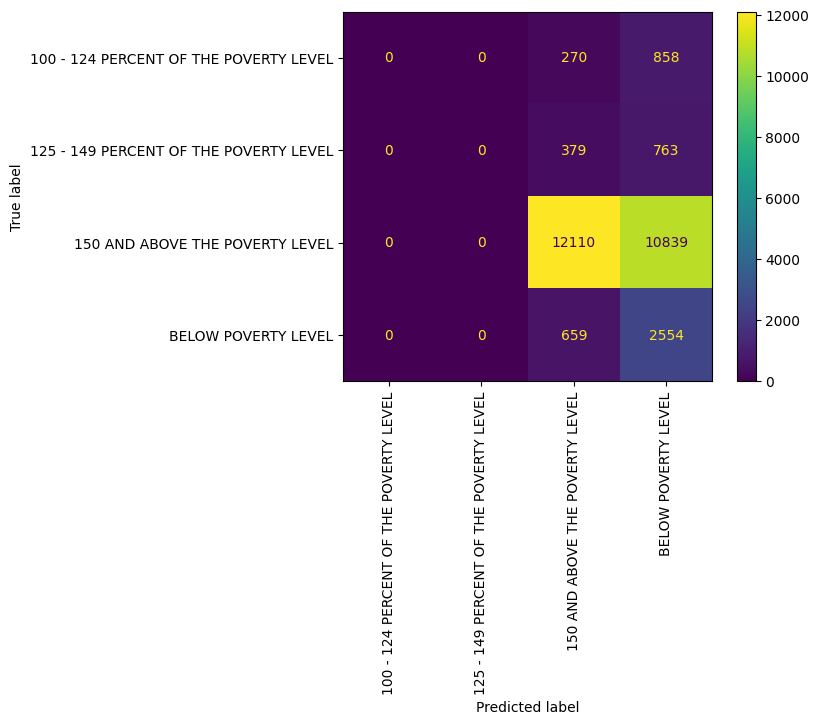

In [98]:
BNB = BernoulliNB()
BNB.fit(X_train_rus, y_train_rus)
BernoulliPrediction = BNB.predict(x_test)
ConfusionMatrixDisplay.from_estimator(BNB, x_test, y_test, xticks_rotation='vertical')
Bernoulli_accuracy = BNB.score(x_test, y_test)

In [99]:
Bernoulli_accuracy

0.5157568936409679